**Import libraries**

**FIRST-SDSS DR16**

In [1]:
#Read data file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#RF classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

# matrics to test the model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KNN /Final Results/FIRST-SDSS.csv')

In [ ]:
df.head()

,FIRST,Fint,Rms,objID,RA,Dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,...,sii_6717_flux,h_alpha_flux,h_gamma_flux,nii_6584_flux_err,h_alpha_flux_err,oiii_5007_flux_err,h_beta_flux,h_beta_flux_err,h_delta_flux,h_delta_flux_err
0,J233432.0+023321,1.57,0.131,1237678619025670741,353.633445,2.555875,25.603975,21.979671,20.141863,20.161863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,J233432.0+023321,1.57,0.131,1237678619025670741,353.633445,2.555875,25.603975,21.979671,20.141863,20.161863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,J104240.5+023320,7.72,0.368,1237651736822284898,160.668752,2.555854,25.373728,23.244883,21.996115,21.131029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J160651.8+023320,2.64,0.153,1237651737931415767,241.715688,2.555603,23.131889,19.271101,17.758698,17.199873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J212701.2+023319,12.12,0.116,1237678598073746790,321.755573,2.555440,24.009775,24.612249,21.946434,21.046663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.class_pred.value_counts()

-9999     195755
GALAXY     91987
QSO        36491
STAR        2154
Name: class_pred, dtype: int64

In [ ]:
df = df[df['class_pred'] != 'GALAXY']
df = df[df['class_pred'] != '-9999']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class_pred'] = le.fit_transform(df['class_pred'])

In [ ]:
df.class_pred.value_counts()

0    36491
1     2154
Name: class_pred, dtype: int64

In [ ]:
df.class_pred.value_counts()

0    36491
1     2154
Name: class_pred, dtype: int64

In [ ]:
u = []
g = []
r = []
i = []
z = []
psf_r = []
petro_50 = []
petro_90 = []
J = []
H = []
K = []
Z_spec = []

In [ ]:
attributes = df.values

In [ ]:
for j in attributes:
    if j[35] ==1 or j[35]==0:
        u.append(j[6])
        g.append(j[7])
        r.append(j[8])
        i.append(j[9])
        z.append(j[10])
        psf_r.append(j[13])
        petro_50.append(j[26])
        petro_90.append(j[27]) 
        Z_spec.append(j[33])

In [ ]:
data = pd.DataFrame([u, g, r, i, z, psf_r,petro_50,petro_90, Z_spec])
Training_set = data.transpose()
Training_set.columns = ['u', 'g', 'r', 'i', 'z', 'psf_r','petro_50','petro_90','Z_spec']

In [ ]:
pred = df['class_pred']

In [ ]:
STAR_GALAXY = []
for c in pred:
  if c ==1 or c ==0:
    STAR_GALAXY.append(c)
  else:
    pass

In [ ]:
Spectroscopic_class = pd.DataFrame(STAR_GALAXY)

In [ ]:
Spectroscopic_class.columns=['Target']

In [ ]:
Spectroscopic_class.Target.value_counts()

0    36491
1     2154
Name: Target, dtype: int64

In [ ]:
Spectroscopic_class.columns=['Target']

In [ ]:
Data = pd.concat([Training_set,Spectroscopic_class], axis=1)

In [ ]:
Data.isnull().sum()

u           0
g           0
r           0
i           0
z           0
psf_r       0
petro_50    0
petro_90    0
Z_spec      0
Target      0
dtype: int64

In [ ]:
Data.fillna(Data.mean())

,u,g,r,i,z,psf_r,petro_50,petro_90,Z_spec,Target
0,25.603975,21.979671,20.141863,20.161863,20.092842,20.131908,0.488823,1.055620,4.101827,0
1,25.603975,21.979671,20.141863,20.161863,20.092842,20.131908,0.488823,1.055620,4.102432,0
2,26.220449,23.178331,21.364912,20.183245,19.410379,21.390882,0.645624,1.667948,4.231273,0
3,21.001680,20.249218,20.144499,20.097799,19.937153,20.141022,0.628131,1.214391,2.409757,0
4,24.732620,22.569502,21.973642,21.560907,22.283861,21.958788,0.569498,0.970590,3.359975,0
...,...,...,...,...,...,...,...,...,...,...
38640,21.860485,19.856102,18.568127,17.964891,17.635857,18.587938,0.676502,1.520145,-0.000330,1
38641,18.165913,18.088326,18.024311,18.020712,18.027832,18.037466,0.561987,1.188193,1.173577,0
38642,20.404755,19.341684,19.311441,19.311319,18.820160,19.306194,0.661164,1.562121,2.614960,0
38643,21.359140,20.701073,20.575113,20.609806,20.093275,20.564081,0.504672,1.307529,2.313817,0


In [ ]:
Data.Target.value_counts()

0    36491
1     2154
Name: Target, dtype: int64

In [ ]:
u_g = Data.u - Data.g
g_r = Data.g - Data.r
r_i = Data.r - Data.i
i_z = Data.i - Data.z
resolv = Data.psf_r - Data.r
c = Data.petro_90 / Data.petro_50
u = Data.u
g = Data.g
r = Data.r
i = Data.i
z = Data.z
Z_spec = Data.Z_spec

In [ ]:
STAR_QSO = pd.DataFrame([u_g, g_r, r_i, i_z, resolv, c, u, g, r, i, z, Z_spec])

In [ ]:
S_Q = STAR_QSO.transpose()
S_Q.columns=['u_g', 'g_r', 'r_i', 'i_z', 'resolv', 'c', 'u', 'g', 'r', 'i', 'z', 'Z_spec']

In [ ]:
Data_STAR_QSO = pd.concat([S_Q, Spectroscopic_class], axis=1)

In [ ]:
Z_spec = Data_STAR_QSO['Z_spec']
resolv = Data_STAR_QSO['resolv']
r = Data_STAR_QSO['r']
u = Data_STAR_QSO['u']
u_g = Data_STAR_QSO['u_g']
i_z = Data_STAR_QSO['i_z']
g_r = Data_STAR_QSO['g_r']
r_i = Data_STAR_QSO['r_i']

In [ ]:
dfram = pd.DataFrame([Z_spec, resolv, r, u, u_g, i_z,g_r, r_i])
X = dfram.transpose()

In [ ]:
X.columns=['Z_spec','resolv', 'r', 'u', 'u_g','i_z','g_r','r_i']

In [ ]:
y = Data.Target

In [ ]:
Final_data = pd.concat([X,y], axis =1)

In [ ]:
X = Final_data.iloc[:,0:8].values
y = Final_data.Target.values

In [ ]:
Final_data

,Z_spec,resolv,r,u,u_g,i_z,g_r,r_i,Target
0,4.101827,-0.009955,20.141863,25.603975,3.624304,0.069021,1.837808,-0.020000,0
1,4.102432,-0.009955,20.141863,25.603975,3.624304,0.069021,1.837808,-0.020000,0
2,4.231273,0.025970,21.364912,26.220449,3.042118,0.772866,1.813419,1.181667,0
3,2.409757,-0.003477,20.144499,21.001680,0.752462,0.160646,0.104719,0.046700,0
4,3.359975,-0.014854,21.973642,24.732620,2.163118,-0.722954,0.595860,0.412735,0
...,...,...,...,...,...,...,...,...,...
38640,-0.000330,0.019811,18.568127,21.860485,2.004383,0.329034,1.287975,0.603236,1
38641,1.173577,0.013155,18.024311,18.165913,0.077587,-0.007120,0.064015,0.003599,0
38642,2.614960,-0.005247,19.311441,20.404755,1.063071,0.491159,0.030243,0.000122,0
38643,2.313817,-0.011032,20.575113,21.359140,0.658067,0.516531,0.125960,-0.034693,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)





































































































































































































































































































**Hyperparameter Tunning**

Grid SearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_features': [1, 2, 3],
    'min_samples_leaf': [1,2, 3, 4],
    'n_estimators': [30, 40 , 50, 55, 60]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'n_estimators': [30, 40, 50, 55, 60]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'max_features': 1, 'min_samples_leaf': 2, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_features=1, min_samples_leaf=2, n_estimators=30)

In [ ]:
RF = rf.set_params( max_features = 1.0,  min_samples_split = 2, n_estimators = 30)

In [ ]:
RF.fit(X_train, y_train)

RandomForestClassifier(max_features=1.0, n_estimators=30)

In [ ]:
y_pred= RF.predict(X_test)

In [ ]:
rf.set_params(max_features = 1,  min_samples_split = 2, n_estimators = 30)

RandomForestClassifier(max_features=1, n_estimators=30)

In [ ]:
RF = rf.set_params(criterion='entropy', max_features=1, min_samples_split=1.0, n_estimators=30)

In [ ]:
rf 

RandomForestClassifier(criterion='entropy', max_features=1,
                       min_samples_split=1.0, n_estimators=30)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Class labels:', np.unique(y))
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(cm)

Class labels: [0 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7298
           1       1.00      1.00      1.00       431

    accuracy                           1.00      7729
   macro avg       1.00      1.00      1.00      7729
weighted avg       1.00      1.00      1.00      7729

[[7298    0]
 [   0  431]]


In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

1.0

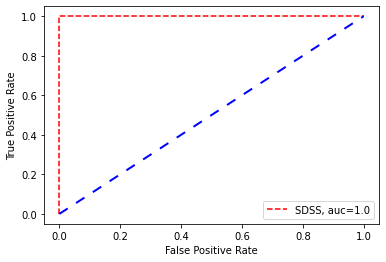

In [ ]:
y_pred_proba = RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="SDSS, auc="+str(auc), linestyle='--',color='r')
plt.plot([0,1], [0,1], linestyle=(0, (5, 5)), linewidth=2, color='b') # add the dotted line with tthe slope of 1
plt.legend(loc=4)
#plt.grid(b=None)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
#from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


**SDSS-FIRST: Random Forest Predicted**

In [ ]:
'''Data_Xtest = pd.DataFrame(X_test)
Data_Xtest.columns = ['Z_spec','resolv', 'r', 'u', 'u_g', 'i_z','g_r']
scaled_back = scaling.inverse_transform(Data_Xtest)
Rescale = pd.DataFrame(scaled_back)
Rescale.columns = ['Z_spec','resolv', 'r', 'u', 'u_g', 'i_z','g_r']'''

"Data_Xtest = pd.DataFrame(X_test)\nData_Xtest.columns = ['Z_spec','resolv', 'r', 'u', 'u_g', 'i_z','g_r']\nscaled_back = scaling.inverse_transform(Data_Xtest)\nRescale = pd.DataFrame(scaled_back)\nRescale.columns = ['Z_spec','resolv', 'r', 'u', 'u_g', 'i_z','g_r']"

In [ ]:
Data_Xtest = pd.DataFrame(X_test)
Data_Xtest.columns = ['Z_spec', 'resolv', 'r', 'u', 'u_g','i_z','g_r','r_i']
scaled_back = scaling.inverse_transform(Data_Xtest)
Rescale = pd.DataFrame(scaled_back)
Rescale.columns = ['Z_spec','resolv', 'r', 'u', 'u_g', 'i_z','g_r','r_i']

In [ ]:
Data_Xtest

,Z_spec,resolv,r,u,u_g,i_z,g_r,r_i
0,-0.714962,-0.333669,0.998211,0.998480,0.103572,0.285836,-0.294789,-0.060529
1,-0.998068,-0.344552,0.998877,0.999133,-0.011711,0.264461,-0.215079,0.018284
2,-0.707131,-0.333585,0.998794,0.998987,0.046217,0.283310,-0.292134,-0.020735
3,-0.488797,-0.339798,0.998373,0.998625,0.092624,0.271007,-0.295581,-0.039806
4,-0.558855,-0.323680,0.998658,0.998682,0.012221,0.180456,-0.356462,-0.035887
...,...,...,...,...,...,...,...,...
7724,-0.241239,-0.336799,0.998546,0.998783,0.130518,0.300907,-0.331630,-0.081290
7725,-0.284589,-0.340199,0.998760,0.999139,0.265409,0.319259,-0.357681,-0.099593
7726,-0.283771,-0.340402,0.998381,0.998458,0.061333,0.289367,-0.365054,-0.085566
7727,-0.084743,-0.324390,0.998723,0.998899,0.063018,0.272463,-0.313568,-0.095852


In [ ]:
Rescale

,Z_spec,resolv,r,u,u_g,i_z,g_r,r_i
0,0.995689,0.024235,18.426685,20.001547,0.942022,0.295984,0.632840,0.239599
1,0.002640,-0.018543,21.764957,23.278273,0.125451,0.091293,1.387865,0.774517
2,1.023156,0.024563,21.351635,22.545383,0.535766,0.271794,0.657982,0.509691
3,1.789006,0.000141,19.241001,20.730810,0.864471,0.153980,0.625338,0.380249
4,1.543265,0.063497,20.669184,21.012812,0.294968,-0.713150,0.048660,0.406851
...,...,...,...,...,...,...,...,...
7724,2.657364,0.011930,20.106564,21.523317,1.132887,0.440304,0.283866,0.098694
7725,2.505303,-0.001434,21.182018,23.307468,2.088340,0.616047,0.037110,-0.025530
7726,2.508174,-0.002231,19.279596,19.889700,0.642836,0.329792,-0.032732,0.069673
7727,3.206301,0.060709,20.993851,22.103582,0.654770,0.167919,0.454961,-0.000139


In [ ]:
predicted = pd.DataFrame(y_pred)
predicted.columns = ['Predicted']
data_yami = pd.concat([Rescale, predicted], axis = 1)
test_data = data_yami.values

In [ ]:
#star
Z_spec_star_test = []
resolv_star_test = []
r_star_test = []
u_star_test = []
u_g_star_test = []
i_z_star_test = []
g_r_star_test = []
r_i_star_test = []
#galaxy
Z_spec_galaxy_test = []
resolv_galaxy_test = []
r_galaxy_test = []
u_galaxy_test = []
u_g_galaxy_test = []
i_z_galaxy_test = []
g_r_galaxy_test = []
r_i_galaxy_test = []

In [ ]:
for i in test_data:
  if i[-1] == 1:
    Z_spec_star_test.append(i[0])
    resolv_star_test.append(i[1])
    r_star_test.append(i[2])
    u_star_test.append(i[3])
    u_g_star_test.append(i[4])
    i_z_star_test.append(i[5])
    g_r_star_test.append(i[6])
    r_i_star_test.append(i[7])
  elif i[-1] == 0:
     Z_spec_galaxy_test.append(i[0])
     resolv_galaxy_test.append(i[1])
     r_galaxy_test.append(i[2])
     u_galaxy_test.append(i[3])
     u_g_galaxy_test.append(i[4])
     i_z_galaxy_test.append(i[5])
     g_r_galaxy_test.append(i[6])
     r_i_galaxy_test.append(i[7])
  else:
      pass

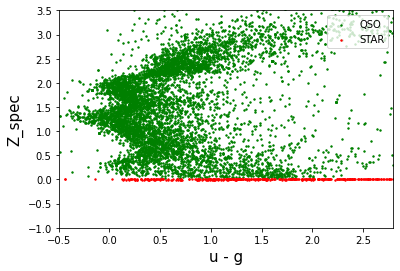

In [ ]:
plt.scatter(u_g_galaxy_test, Z_spec_galaxy_test , color='g', marker='o', label="QSO",s=2)
plt.scatter(u_g_star_test,Z_spec_star_test, color='red', marker='o', label="STAR",s=2 )
plt.ylabel('Z_spec' ,  fontsize=15, color="k")
plt.xlabel('u - g',  fontsize=15, color="k")
plt.ylim(-1, 3.5)
plt.xlim(-0.5, 2.8)
plt.legend(loc = 1)

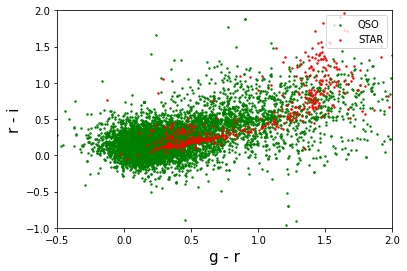

In [ ]:
plt.scatter( g_r_galaxy_test, r_i_galaxy_test , color='g', marker='o', label="QSO",s=2)
plt.scatter( g_r_star_test,r_i_star_test,color='red', marker='o', label="STAR",s=2 )
plt.ylabel('r - i' ,  fontsize=15, color="k")
plt.xlabel('g - r',  fontsize=15, color="k")
plt.ylim(-1, 2)
plt.xlim(-0.5, 2)
plt.legend(loc = 1)


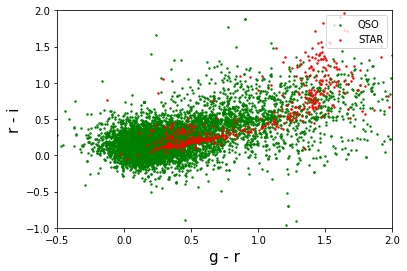

In [ ]:
plt.scatter(g_r_galaxy_test, r_i_galaxy_test , color='g', marker='o', label="QSO",s=2)
plt.scatter( g_r_star_test, r_i_star_test, color='red', marker='o', label="STAR",s=2 )
plt.ylabel('r - i' ,  fontsize=15, color="k")
plt.xlabel('g - r',  fontsize=15, color="k")
plt.ylim(-1, 2)
plt.xlim(-0.5, 2)
plt.legend(loc = 1)

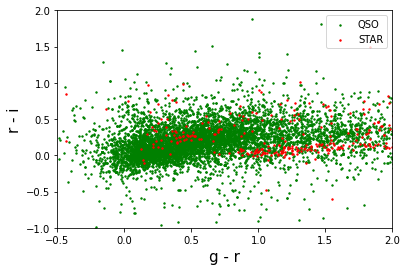

In [ ]:
plt.scatter(u_g_galaxy_test, i_z_galaxy_test , color='g', marker='o', label="QSO",s=2)
plt.scatter(u_g_star_test, i_z_star_test, color='red', marker='o', label="STAR",s=2 )
plt.ylabel('r - i' ,  fontsize=15, color="k")
plt.xlabel('g - r',  fontsize=15, color="k")
plt.ylim(-1, 2)
plt.xlim(-0.5, 2)
plt.legend(loc = 1)


**Observational Data**

In [ ]:
y_test_Frame = pd.DataFrame(y_test)

In [ ]:
X_test

array([[-0.71496196, -0.33366872,  0.99821064, ...,  0.28583634,
        -0.29478863, -0.06052937],
       [-0.99806822, -0.34455162,  0.99887654, ...,  0.26446113,
        -0.21507932,  0.01828444],
       [-0.70713139, -0.33358528,  0.99879409, ...,  0.28331026,
        -0.29213435, -0.02073452],
       ...,
       [-0.28377097, -0.34040178,  0.99838078, ...,  0.2893668 ,
        -0.36505423, -0.08556594],
       [-0.08474348, -0.32438959,  0.99872272, ...,  0.27246293,
        -0.31356763, -0.09585191],
       [-0.9988414 , -0.33905598,  0.99839543, ...,  0.30764419,
        -0.22253796,  0.05826286]])

In [ ]:
X_test_data = pd.DataFrame(X_test, columns = ['Z_spec','resolv', 'r', 'u', 'u_g', 'i_z'])

ValueError: ignored

In [ ]:
X_test_data

NameError: ignored

In [ ]:
y_test_Frame.columns=['class_pred']

In [ ]:
y_test_Frame

,class_pred
0,0
1,1
2,0
3,0
4,0
...,...
7724,0
7725,0
7726,0
7727,0


In [ ]:
Rescale

,Z_spec,resolv,r,u,u_g,i_z,g_r,r_i
0,0.995689,0.024235,18.426685,20.001547,0.942022,0.295984,0.632840,0.239599
1,0.002640,-0.018543,21.764957,23.278273,0.125451,0.091293,1.387865,0.774517
2,1.023156,0.024563,21.351635,22.545383,0.535766,0.271794,0.657982,0.509691
3,1.789006,0.000141,19.241001,20.730810,0.864471,0.153980,0.625338,0.380249
4,1.543265,0.063497,20.669184,21.012812,0.294968,-0.713150,0.048660,0.406851
...,...,...,...,...,...,...,...,...
7724,2.657364,0.011930,20.106564,21.523317,1.132887,0.440304,0.283866,0.098694
7725,2.505303,-0.001434,21.182018,23.307468,2.088340,0.616047,0.037110,-0.025530
7726,2.508174,-0.002231,19.279596,19.889700,0.642836,0.329792,-0.032732,0.069673
7727,3.206301,0.060709,20.993851,22.103582,0.654770,0.167919,0.454961,-0.000139


In [ ]:
data_Frame_X_test = pd.DataFrame(Rescale)

In [ ]:
data_Frame_X_test 

,Z_spec,resolv,r,u,u_g,i_z,g_r,r_i
0,0.995689,0.024235,18.426685,20.001547,0.942022,0.295984,0.632840,0.239599
1,0.002640,-0.018543,21.764957,23.278273,0.125451,0.091293,1.387865,0.774517
2,1.023156,0.024563,21.351635,22.545383,0.535766,0.271794,0.657982,0.509691
3,1.789006,0.000141,19.241001,20.730810,0.864471,0.153980,0.625338,0.380249
4,1.543265,0.063497,20.669184,21.012812,0.294968,-0.713150,0.048660,0.406851
...,...,...,...,...,...,...,...,...
7724,2.657364,0.011930,20.106564,21.523317,1.132887,0.440304,0.283866,0.098694
7725,2.505303,-0.001434,21.182018,23.307468,2.088340,0.616047,0.037110,-0.025530
7726,2.508174,-0.002231,19.279596,19.889700,0.642836,0.329792,-0.032732,0.069673
7727,3.206301,0.060709,20.993851,22.103582,0.654770,0.167919,0.454961,-0.000139


In [ ]:
data_Frame_X_test

,Z_spec,resolv,r,u,u_g,i_z,g_r,r_i
0,0.995689,0.024235,18.426685,20.001547,0.942022,0.295984,0.632840,0.239599
1,0.002640,-0.018543,21.764957,23.278273,0.125451,0.091293,1.387865,0.774517
2,1.023156,0.024563,21.351635,22.545383,0.535766,0.271794,0.657982,0.509691
3,1.789006,0.000141,19.241001,20.730810,0.864471,0.153980,0.625338,0.380249
4,1.543265,0.063497,20.669184,21.012812,0.294968,-0.713150,0.048660,0.406851
...,...,...,...,...,...,...,...,...
7724,2.657364,0.011930,20.106564,21.523317,1.132887,0.440304,0.283866,0.098694
7725,2.505303,-0.001434,21.182018,23.307468,2.088340,0.616047,0.037110,-0.025530
7726,2.508174,-0.002231,19.279596,19.889700,0.642836,0.329792,-0.032732,0.069673
7727,3.206301,0.060709,20.993851,22.103582,0.654770,0.167919,0.454961,-0.000139


In [ ]:
{1,2,3}.difference

<function set.difference>

In [ ]:
Final_data.columns

Index(['Z_spec', 'resolv', 'r', 'u', 'u_g', 'i_z', 'g_r', 'r_i', 'Target'], dtype='object')

In [ ]:
data_Frame_X_test.columns = ['Z_spec', 'resolv', 'r', 'u', 'u_g', 'i_z']

ValueError: ignored

In [ ]:
data_yami = pd.concat([Rescale, y_test_Frame], axis = 1)

In [ ]:
data_yami

,Z_spec,resolv,r,u,u_g,i_z,g_r,r_i,class_pred
0,0.995689,0.024235,18.426685,20.001547,0.942022,0.295984,0.632840,0.239599,0
1,0.002640,-0.018543,21.764957,23.278273,0.125451,0.091293,1.387865,0.774517,1
2,1.023156,0.024563,21.351635,22.545383,0.535766,0.271794,0.657982,0.509691,0
3,1.789006,0.000141,19.241001,20.730810,0.864471,0.153980,0.625338,0.380249,0
4,1.543265,0.063497,20.669184,21.012812,0.294968,-0.713150,0.048660,0.406851,0
...,...,...,...,...,...,...,...,...,...
7724,2.657364,0.011930,20.106564,21.523317,1.132887,0.440304,0.283866,0.098694,0
7725,2.505303,-0.001434,21.182018,23.307468,2.088340,0.616047,0.037110,-0.025530,0
7726,2.508174,-0.002231,19.279596,19.889700,0.642836,0.329792,-0.032732,0.069673,0
7727,3.206301,0.060709,20.993851,22.103582,0.654770,0.167919,0.454961,-0.000139,0


In [ ]:
test_data = data_yami.values

In [ ]:
#star
Z_spec_star_test_t = []
resolv_star_test_t = []
u_g_star_test_t = []
i_z_star_test_t = []
#galaxy
Z_spec_galaxy_test_t = []
resolv_galaxy_test_t = []
u_g_galaxy_test_t = []
i_z_galaxy_test_t = []

In [ ]:
for i in test_data:
  if i[-1] == 1:
    Z_spec_star_test_t.append(i[0])
    resolv_star_test_t.append(i[1])
    u_g_star_test_t.append(i[4])
    i_z_star_test_t.append(i[5])
  elif i[-1] == 0:
     Z_spec_galaxy_test_t.append(i[0])
     resolv_galaxy_test_t.append(i[1])
     u_g_galaxy_test_t.append(i[4])
     i_z_galaxy_test_t.append(i[5])
  else:
      pass


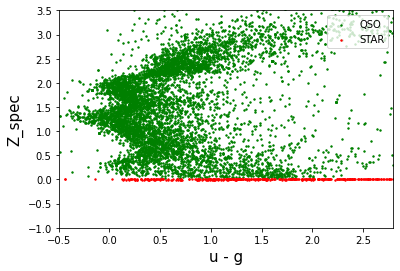

In [ ]:
plt.scatter(u_g_galaxy_test, Z_spec_galaxy_test , color='g', marker='o', label="QSO",s=2)
plt.scatter(u_g_star_test,Z_spec_star_test, color='red', marker='o', label="STAR",s=2 )
plt.ylabel('Z_spec' ,  fontsize=15, color="k")
plt.xlabel('u - g',  fontsize=15, color="k")
plt.ylim(-1, 3.5)
plt.xlim(-0.5, 2.8)
plt.legend(loc = 1)

In [ ]:
'''y_pred
X_test
Data_Xtest = pd.DataFrame(X_test)
Data_Xtest.columns = ['Z_spec', 'H_K', 'resolv', 'z_J']
scaled_back = scaling.inverse_transform(Data_Xtest)
Rescale = pd.DataFrame(scaled_back)
Rescale.columns = ['Z_spec', 'H_K', 'resolv', 'z_J']
y_pred
predicted = pd.DataFrame(y_pred)
predicted.columns = ['Predicted']
data_yami = pd.concat([Rescale, predicted], axis = 1)
test_data = data_yami.values
#star
Z_spec_star_test = []
H_K_star_test = []
resolv_star_test = []
z_J_star_test = []
#galaxy
Z_spec_galaxy_test = []
H_K_galaxy_test = []
resolv_galaxy_test = []
z_J_galaxy_test = []

for i in test_data:
  if i[-1] == 1:
    Z_spec_star_test.append(i[0])
    H_K_star_test.append(i[1])
    resolv_star_test.append(i[2])
    z_J_star_test.append(i[3])
  elif i[-1] == 0:
     Z_spec_galaxy_test.append(i[0])
     H_K_galaxy_test.append(i[1])
     resolv_galaxy_test.append(i[2])
     z_J_galaxy_test.append(i[3])
  else:
      pass
print('Predicted')
plt.scatter(  z_J_galaxy_test, H_K_galaxy_test ,color='blue', marker='o', label="GALAXY",s=2)
plt.scatter( z_J_star_test,  H_K_star_test, color='red', marker='o', label="STAR",s=2 )
plt.xlabel('z - J' ,  fontsize=15, color="k")
plt.ylabel('H - K',  fontsize=15, color="k")
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.legend(loc = 1)'''

'y_pred\nX_test\nData_Xtest = pd.DataFrame(X_test)\nData_Xtest.columns = [\'Z_spec\', \'H_K\', \'resolv\', \'z_J\']\nscaled_back = scaling.inverse_transform(Data_Xtest)\nRescale = pd.DataFrame(scaled_back)\nRescale.columns = [\'Z_spec\', \'H_K\', \'resolv\', \'z_J\']\ny_pred\npredicted = pd.DataFrame(y_pred)\npredicted.columns = [\'Predicted\']\ndata_yami = pd.concat([Rescale, predicted], axis = 1)\ntest_data = data_yami.values\n#star\nZ_spec_star_test = []\nH_K_star_test = []\nresolv_star_test = []\nz_J_star_test = []\n#galaxy\nZ_spec_galaxy_test = []\nH_K_galaxy_test = []\nresolv_galaxy_test = []\nz_J_galaxy_test = []\n\nfor i in test_data:\n  if i[-1] == 1:\n    Z_spec_star_test.append(i[0])\n    H_K_star_test.append(i[1])\n    resolv_star_test.append(i[2])\n    z_J_star_test.append(i[3])\n  elif i[-1] == 0:\n     Z_spec_galaxy_test.append(i[0])\n     H_K_galaxy_test.append(i[1])\n     resolv_galaxy_test.append(i[2])\n     z_J_galaxy_test.append(i[3])\n  else:\n      pass\nprint(\'P

**FIRST-SDSS-2MASS**

In [ ]:
#Read data file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#RF classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

# matrics to test the model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KNN /Final Results/FIRST-SDSS-2MASS.csv')

In [ ]:
df = df[df['class_pred'] != 'GALAXY']
df = df[df['class_pred'] != '-9999']

In [ ]:
df.head()

,angDist,FIRST,Fint,Rms,objID,RA,Dec,modelMag_u,modelMag_g,modelMag_r,...,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD
17,0.154977,J143515.5+023222,1.07,0.153,1237651754564190252,218.815220,2.539333,17.328638,17.154522,16.902887,...,15.604,14.351,12.934,0.061,0.054,0.039,AAA,222,0,2.451641e+06
18,0.154977,J143515.5+023222,1.07,0.153,1237651754564190252,218.815220,2.539333,17.328638,17.154522,16.902887,...,15.604,14.351,12.934,0.061,0.054,0.039,AAA,222,0,2.451641e+06
34,0.277416,J160314.8+023136,139.93,0.179,1237651737931022452,240.811880,2.526718,18.090179,17.790094,17.409977,...,16.854,15.627,15.588,0.163,0.111,0.195,CBC,222,0,2.451666e+06
38,0.284034,J101502.2+023128,9.60,0.139,1237653665260503054,153.759365,2.524478,18.690046,18.448227,17.965284,...,16.450,15.671,14.797,0.133,0.154,0.124,BBB,222,0,2.451581e+06
39,0.265007,J234032.8+023125,28.85,0.122,1237678619026325847,355.137080,2.523699,21.217978,20.636702,20.423008,...,16.362,15.672,14.862,0.100,0.112,0.102,ABA,222,0,2.451785e+06


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class_pred'] = le.fit_transform(df['class_pred'])

In [ ]:
u_g = df.modelMag_u - df.modelMag_g
g_r = df.modelMag_g - df.modelMag_r
r_i = df.modelMag_r - df.modelMag_i
i_z = df.modelMag_i - df.modelMag_z
resolv = df.psfMag_r - df.modelMag_u
c = df.petroR90_r / df.petroR50_r
z_J = df.modelMag_z - df.Jmag
J_H = df.Jmag - df.Hmag
H_K = df.Hmag - df.Kmag
Z_spec = df.SpecZ
#K_W1 = Data.H - Data.W1 
#W1_W2 = Data.W1 - Data.W2
#W2_W3 = Data.W2 - Data.W3
#W3_W4 = Data.W3 - Data.W4  
#i_J = Data.i - Data.J 

In [ ]:
DataFrame = pd.DataFrame([u_g, g_r, Z_spec, H_K, resolv,z_J])

In [ ]:
P = DataFrame.transpose()

In [ ]:
P.columns=['u - g', 'g - r','Z_spec', 'H_K', 'resolv','z_J']

In [ ]:
y =  df.class_pred

In [ ]:
Train_test_data = pd.concat([P,y], axis = 1)

In [ ]:
Train_test_data.fillna(Train_test_data.mean(),inplace=True)

In [ ]:
Train_test_data.dropna(inplace=True)

In [ ]:
Train_test_data

,u - g,g - r,Z_spec,H_K,resolv,z_J,class_pred
17,0.174116,0.251635,0.304826,1.417,-0.417404,0.657263,0
18,0.174116,0.251635,0.304887,1.417,-0.417404,0.657263,0
34,0.300085,0.380117,1.310175,0.039,-0.669246,0.461359,0
38,0.241819,0.482943,0.218303,0.874,-0.264740,1.008687,0
39,0.581276,0.213694,0.651248,0.810,-0.747473,3.386537,0
...,...,...,...,...,...,...,...
79525,0.736528,0.764229,1.015927,0.875,-1.487384,1.613950,0
79533,0.352668,0.426134,0.000487,0.181,-0.750644,3.028002,1
79555,0.453423,0.050790,0.645053,0.641,-0.484268,0.984951,0
79565,2.004383,1.287975,-0.000330,0.450,-3.272547,1.126857,1


In [ ]:
Train_test_data.fillna(Train_test_data.mean(), inplace = True)

In [ ]:
df.class_pred.value_counts()

0    6647
1     961
Name: class_pred, dtype: int64

In [ ]:
y = Train_test_data.class_pred
X = Train_test_data.iloc[:, 0:4]

**Bad  parameter**

In [ ]:
X = Train_test_data[['u - g', 'g - r']]
y = Train_test_data['class_pred']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

**Hyper-parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_features': [1, 2, 3],
    'min_samples_leaf': [2, 3],
    'n_estimators': [30, 40, 45, 50],
    'min_samples_split': [4, 5, 6],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [30, 40, 45, 50]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'max_features': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 40}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_features=1, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=40)

In [ ]:
RF = rf.set_params(criterion = 'entropy',
                   max_features=2, 
                   min_samples_leaf=2, 
                   min_samples_split=5,
                    n_estimators=40)

In [ ]:
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=2, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=40)

In [ ]:
y_pred= RF.predict(X_test)

In [ ]:
rf.set_params(criterion='entropy', 
              max_features=2, 
              min_samples_leaf=2,
              min_samples_split=5, 
              n_estimators=40)

RandomForestClassifier(criterion='entropy', max_features=2, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=40)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Class labels:', np.unique(y))
print("Test - Accuracy :", metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(cm)

Class labels: [0 1]
Test - Accuracy : 0.9467805519053877
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1330
           1       0.84      0.72      0.77       192

    accuracy                           0.95      1522
   macro avg       0.90      0.85      0.87      1522
weighted avg       0.94      0.95      0.95      1522

[[1303   27]
 [  54  138]]


In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.7431592894911186

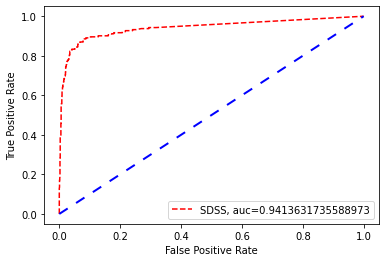

In [ ]:
y_pred_proba = RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="SDSS, auc="+str(auc), linestyle='--',color='r')
plt.plot([0,1], [0,1], linestyle=(0, (5, 5)), linewidth=2, color='b') # add the dotted line with tthe slope of 1
plt.legend(loc=4)
#plt.grid(b=None)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

 **Random Forest Predicted**

In [ ]:
Data_Xtest = pd.DataFrame(X_test)

In [ ]:
X_test

array([[-0.12190023, -0.35191224],
       [ 0.11053052, -0.23425874],
       [ 0.17204858, -0.2870325 ],
       ...,
       [ 0.07901576, -0.25791036],
       [-0.01185214, -0.34883521],
       [-0.1452519 , -0.34492713]])

In [ ]:
Data_Xtest = pd.DataFrame(X_test)

In [ ]:
#Data_Xtest.columns = ['Z_spec', 'H_K', 'resolv', 'z_J']

In [ ]:
Data_Xtest.columns = ['u - g', 'g - r']

In [ ]:
X_test_data = pd.DataFrame(X_test, columns = ['u - g', 'g - r'])

**Bad Parameter**

In [ ]:
X_test_data = pd.DataFrame(X_test, columns = ['u - g', 'g - r'])

In [ ]:
scaled_back = scaling.inverse_transform(Data_Xtest)

In [ ]:
Rescale = pd.DataFrame(scaled_back)

In [ ]:
Rescale.columns =  ['u - g', 'g - r']

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
predicted = pd.DataFrame(y_pred)

In [ ]:
predicted.columns = ['Predicted']

In [ ]:
data_yami = pd.concat([Rescale, predicted], axis = 1)

In [ ]:
test_data = data_yami.values

In [ ]:
#star
Z_spec_star_test = []
H_K_star_test = []
resolv_star_test = []
z_J_star_test = []
#galaxy
Z_spec_galaxy_test = []
H_K_galaxy_test = []
resolv_galaxy_test = []
z_J_galaxy_test = []

for i in test_data:
  if i[-1] == 1:
    Z_spec_star_test.append(i[0])
    H_K_star_test.append(i[1])
    resolv_star_test.append(i[2])
    z_J_star_test.append(i[3])
  elif i[-1] == 0:
     Z_spec_galaxy_test.append(i[0])
     H_K_galaxy_test.append(i[1])
     resolv_galaxy_test.append(i[2])
     z_J_galaxy_test.append(i[3])
  else:
      pass

Predicted


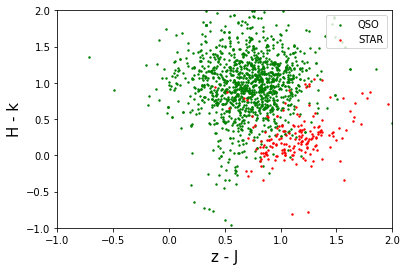

In [ ]:
print('Predicted')
plt.scatter(H_K_galaxy_test ,z_J_galaxy_test, color='g', marker='o', label="QSO",s=2)
plt.scatter(z_J_star_test, H_K_star_test, color='red', marker='o', label="STAR",s=2 )
plt.ylabel('H - k' ,  fontsize=15, color="k")
plt.xlabel('z - J',  fontsize=15, color="k")
plt.ylim(-1, 2)
plt.xlim(-1, 2)
plt.legend(loc = 1)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:

X_test

array([[-0.12190023, -0.35191224],
       [ 0.11053052, -0.23425874],
       [ 0.17204858, -0.2870325 ],
       ...,
       [ 0.07901576, -0.25791036],
       [-0.01185214, -0.34883521],
       [-0.1452519 , -0.34492713]])

In [ ]:
Data_Xtest = pd.DataFrame(X_test)

In [ ]:
Data_Xtest.columns = ['Z_spec', 'H_K', 'resolv', 'z_J']

In [ ]:
scaled_back = scaling.inverse_transform(Data_Xtest)

In [ ]:
Rescale = pd.DataFrame(scaled_back)

In [ ]:
Rescale.columns = ['Z_spec', 'H_K', 'resolv', 'z_J']

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
predicted = pd.DataFrame(y_pred)

In [ ]:
predicted.columns = ['Predicted']

In [ ]:
data_yami = pd.concat([Rescale, predicted], axis = 1)

In [ ]:
test_data = data_yami.values

In [ ]:
#star
Z_spec_star_test = []
H_K_star_test = []
resolv_star_test = []
z_J_star_test = []
#galaxy
Z_spec_galaxy_test = []
H_K_galaxy_test = []
resolv_galaxy_test = []
z_J_galaxy_test = []

for i in test_data:
  if i[-1] == 1:
    Z_spec_star_test.append(i[0])
    H_K_star_test.append(i[1])
    resolv_star_test.append(i[2])
    z_J_star_test.append(i[3])
  elif i[-1] == 0:
     Z_spec_galaxy_test.append(i[0])
     H_K_galaxy_test.append(i[1])
     resolv_galaxy_test.append(i[2])
     z_J_galaxy_test.append(i[3])
  else:
      pass

Predicted


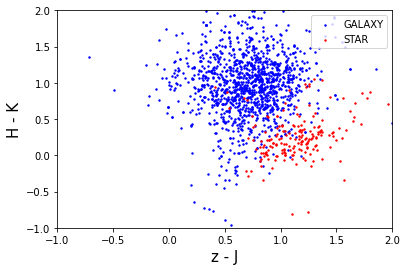

In [ ]:
print('Predicted')
plt.scatter(H_K_galaxy_test ,z_J_galaxy_test,color='blue', marker='o', label="GALAXY",s=2)
plt.scatter(z_J_star_test, H_K_star_test,  color='red', marker='o', label="STAR",s=2 )
plt.xlabel('z - J' ,  fontsize=15, color="k")
plt.ylabel('H - K',  fontsize=15, color="k")
plt.ylim(-1, 2)
plt.xlim(-1, 2)
plt.legend(loc = 1)

Observe data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KNN /Final Results/FIRST-SDSS-2MASS.csv')
df = df[df['class_pred'] !='GALAXY']
df=df[df['class_pred']!='-9999']
df.shape

(7608, 74)

In [ ]:
u_g = df.modelMag_u - df.modelMag_g
g_r =df.modelMag_g - df.modelMag_r
Z_spec = df.SpecZ
z = df.modelMag_z
resolv = df.psfMag_r - df.modelMag_u
z_J = df.modelMag_z -  df.Jmag
J_H =  df.Jmag -  df.Hmag
H_K =  df.Hmag -  df.Kmag
#K_W1 = Data.H - Data.W1 
#W1_W2 = Data.W1 - Data.W2
#W2_W3 = Data.W2 - Data.W3
#W3_W4 = Data.W3 - Data.W4  
#i_J = Data.i - Data.J 

In [ ]:
GALAXY = df['class_pred']

In [ ]:
data = pd.DataFrame([u_g, g_r,Z_spec,z,resolv,z_J,H_K])
G = data.transpose()
G.columns = ['u_g', 'g_r','Z_spec','z','resolv','z_J','H_K']

In [ ]:
Data = pd.concat([G,GALAXY], axis=1)

In [ ]:
Data

,u_g,g_r,Z_spec,z,resolv,z_J,H_K,class_pred
17,0.174116,0.251635,0.304826,16.261263,-0.417404,0.657263,1.417,QSO
18,0.174116,0.251635,0.304887,16.261263,-0.417404,0.657263,1.417,QSO
34,0.300085,0.380117,1.310175,17.315359,-0.669246,0.461359,0.039,QSO
38,0.241819,0.482943,0.218303,17.458687,-0.264740,1.008687,0.874,QSO
39,0.581276,0.213694,0.651248,19.748537,-0.747473,3.386537,0.810,QSO
...,...,...,...,...,...,...,...,...
79525,0.736528,0.764229,1.015927,17.931950,-1.487384,1.613950,0.875,QSO
79533,0.352668,0.426134,0.000487,19.528002,-0.750644,3.028002,0.181,STAR
79555,0.453423,0.050790,0.645053,18.376951,-0.484268,0.984951,0.641,QSO
79565,2.004383,1.287975,-0.000330,17.635857,-3.272547,1.126857,0.450,STAR


In [ ]:
data = Data.values

In [ ]:
data

array([[0.1741160000000015, 0.2516350000000003, 0.3048264, ...,
        0.6572630000000004, 1.4170000000000016, 'QSO'],
       [0.1741160000000015, 0.2516350000000003, 0.3048875, ...,
        0.6572630000000004, 1.4170000000000016, 'QSO'],
       [0.30008499999999927, 0.38011700000000204, 1.3101753, ...,
        0.46135900000000163, 0.03900000000000148, 'QSO'],
       ...,
       [0.4534230000000008, 0.050789999999999225, 0.6450533, ...,
        0.9849509999999988, 0.641, 'QSO'],
       [2.0043830000000007, 1.2879749999999994, -0.00033, ...,
        1.126857000000001, 0.45000000000000107, 'STAR'],
       [0.26269299999999873, 0.022997000000000156, 0.4343848, ...,
        1.0083179999999974, 0.8780000000000001, 'QSO']], dtype=object)

In [ ]:
Z_spec_staro = []
z_staro = []
resolv_staro = []
z_J_staro = []
H_K_staro = []
Z_spec_galaxyo = []
z_galaxyo = []
resolv_galaxyo = []
z_J_galaxyo = []
H_K_galaxyo = []

In [ ]:
for i in data:
  if i[-1] == "STAR":
    Z_spec_staro.append(i[2])
    z_staro.append(i[3])
    resolv_staro.append(i[4])
    z_J_staro.append(i[5])
    H_K_staro.append(i[6])
  elif i[-1] == "QSO":
    Z_spec_galaxyo.append(i[2])
    z_galaxyo.append(i[3])
    resolv_galaxyo.append(i[4])
    z_J_galaxyo.append(i[5])
    H_K_galaxyo.append(i[6])
  else:
      pass



Text(0, 0.5, 'z - J')

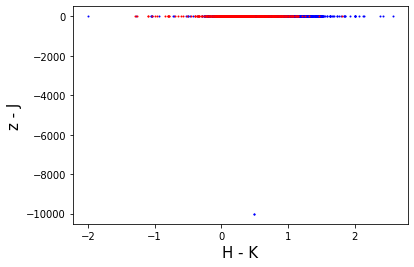

In [ ]:
plt.scatter(H_K_galaxyo, z_J_galaxyo ,color='blue', marker='o', label="GALAXY", s=1)
plt.scatter(H_K_staro,z_J_staro, color='red', marker='o', label="STAR",s=1)
plt.xlabel('H - K',  fontsize=15, color="k")
plt.ylabel('z - J',  fontsize=15, color="k")
#plt.legend(loc = 1)

Random Forest Predicted

In [ ]:
inverse = scaling.inverse_transform(X_test)

In [ ]:
data_df = inverse

In [ ]:
x_tesst = pd.DataFrame(data_df)

In [ ]:
x_tesst

,0,1
0,0.274910,0.203937
1,1.729673,1.308615
2,2.114709,0.813109
3,0.575155,0.222996
4,0.718298,0.602018
...,...,...
1517,1.320101,0.477920
1518,0.272987,0.303583
1519,1.532425,1.086544
1520,0.963691,0.232828


In [ ]:
X_test 

array([[-0.12190023, -0.35191224],
       [ 0.11053052, -0.23425874],
       [ 0.17204858, -0.2870325 ],
       ...,
       [ 0.07901576, -0.25791036],
       [-0.01185214, -0.34883521],
       [-0.1452519 , -0.34492713]])

In [ ]:
x_tesst.columns=['u - g', 'g - r']

In [ ]:
predict = pd.DataFrame(y_pred)

In [ ]:
predict.columns = ['Target']

In [ ]:
Dat = pd.concat([x_tesst, predict], axis=1)

In [ ]:
Dat

,u - g,g - r,Target
0,0.274910,0.203937,0
1,1.729673,1.308615,0
2,2.114709,0.813109,0
3,0.575155,0.222996,0
4,0.718298,0.602018,0
...,...,...,...
1517,1.320101,0.477920,1
1518,0.272987,0.303583,0
1519,1.532425,1.086544,0
1520,0.963691,0.232828,0


In [ ]:
ac = Dat.values

In [ ]:
resolv_star = []
H_K_star = []
z_J_star = []
for p in ac:
    if p[-1] ==1:
        resolv_star.append(p[1])
        H_K_star.append(p[2])
        z_J_star.append(p[3])
    else:
        pass

In [ ]:
resolv_galaxy = []
H_K_galaxy = []
z_J_galaxy = []
for p in ac:
    if p[-1] ==0:
        resolv_galaxy.append(p[1])
        H_K_galaxy.append(p[2])
        z_J_galaxy.append(p[3])
    else:
        pass

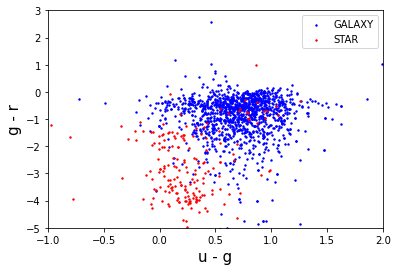

In [ ]:
plt.scatter(resolv_galaxy, H_K_galaxy , color='blue', marker='o', label="GALAXY",s=2)
plt.scatter(resolv_star, H_K_star, color='red', marker='o', label="STAR",s=2 )
plt.xlabel('u - g' ,  fontsize=15, color="k")
plt.ylabel('g - r',  fontsize=15, color="k")
plt.ylim(-5, 3)
plt.xlim(-1, 2)
plt.legend(loc = 1)

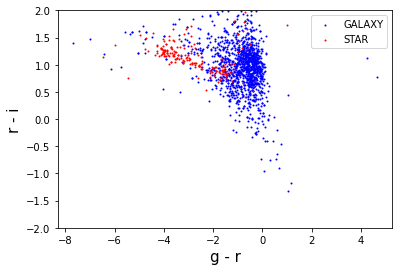

In [ ]:
plt.scatter(H_K_galaxy, z_J_galaxy , color='blue', marker='o', label="GALAXY", s=1)
plt.scatter(H_K_star, z_J_star, color='red', marker='o', label="STAR",s=1)
plt.xlabel('g - r',  fontsize=15, color="k")
plt.ylabel('r - i',  fontsize=15, color="k")
plt.ylim(-2, 2)
#plt.xlim(-1.5, 2.5)
plt.legend(loc = 1)

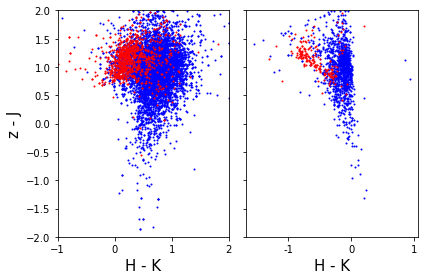

In [ ]:
import matplotlib.pyplot as plt
fig, axes= plt.subplots(nrows=1, ncols=2, sharey='row')

axes[0].scatter( H_K_galaxyo, z_J_galaxyo, color='blue', marker='o', label="GALAXY", s=1)
axes[0].scatter( H_K_staro,z_J_staro,color='red', marker='o', label="STAR",s=1)
axes[0].set_ylim(-2,2)
axes[0].set_xlim(-1,2)
axes[0].set_xlabel('H - K',  fontsize=15, color="k")
axes[0].set_ylabel('z - J',  fontsize=15, color="k")
#Knn classifier
axes[1].scatter( H_K_galaxy, z_J_galaxy ,  color='blue', marker='o', label="GALAXY", s=1)
axes[1].scatter(H_K_star, z_J_star,color='red', marker='o', label="STAR",s=1)
axes[1].set_ylim(-2,2)
#axes[1].set_xlim(-4,2)
axes[1].set_xticklabels(['-2','-1','0','1','2'])
axes[1].set_xlabel('H - K',  fontsize=15, color="k")
#axes[1].set_ylabel('z - J',  fontsize=15, color="k")
plt.tight_layout()
plt.tight_layout()
plt.show()

**Bad Parametrs**

In [ ]:
test_data = data_yami.values

In [ ]:
u_g_star_test = []
g_r_star_test = []
#galaxy
u_g_galaxy_test = []
g_r_galaxy_test = []


for i in test_data:
  if i[-1] == 1:
    u_g_star_test.append(i[0])
    g_r_star_test.append(i[1])
  elif i[-1] == 0:
    u_g_galaxy_test.append(i[0])
    g_r_galaxy_test.append(i[1])

Testing


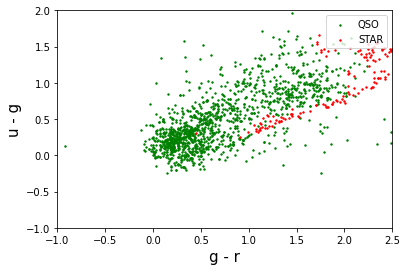

In [ ]:
print('Testing')
plt.scatter(u_g_galaxy_test, g_r_galaxy_test ,color='g', marker='o', label="QSO",s=2)
plt.scatter(u_g_star_test, g_r_star_test, color='red', marker='o', label="STAR",s=2 )
plt.ylabel('u - g' ,  fontsize=15, color="k")
plt.xlabel('g - r',  fontsize=15, color="k")
plt.ylim(-1, 2)
plt.xlim(-1, 2.5)
plt.legend(loc = 1)
plt.savefig('Fig')

In [ ]:
ac

array([[0.27491 , 0.203937, 0.      ],
       [1.729673, 1.308615, 0.      ],
       [2.114709, 0.813109, 0.      ],
       ...,
       [1.532425, 1.086544, 0.      ],
       [0.963691, 0.232828, 0.      ],
       [0.128754, 0.269522, 0.      ]])

In [ ]:
u_g_star_testq = []
g_r_star_testq = []
#galaxy
u_g_galaxy_testq = []
g_r_galaxy_testq = []


for i in test_data:
  if i[-1] == 1:
    u_g_star_testq.append(i[0])
    g_r_star_testq.append(i[1])
  elif i[-1] == 0:
    u_g_galaxy_testq.append(i[0])
    g_r_galaxy_testq.append(i[1])
  else:
      pass

Predicted


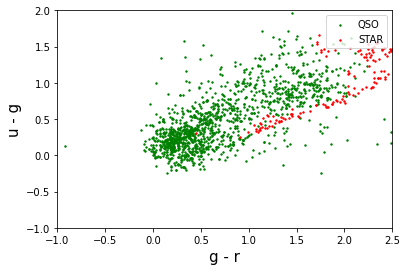

In [ ]:
print('Predicted')
plt.scatter(u_g_galaxy_testq, g_r_galaxy_testq ,color='g', marker='o', label="QSO",s=2)
plt.scatter(u_g_star_testq, g_r_star_testq, color='red', marker='o', label="STAR",s=2 )
plt.ylabel('u - g' ,  fontsize=15, color="k")
plt.xlabel('g - r',  fontsize=15, color="k")
plt.ylim(-1, 2)
plt.xlim(-1, 2.5)
plt.legend(loc = 1)
plt.savefig('Fig')

**FISRT-SDSS-2MASS-WISE**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KNN /Final Results/FIRST-SDSS-2MASS-WISE.csv')
df = df[df['class_pred'] !='GALAXY']
df=df[df['class_pred']!='-9999']
df.shape

(7570, 101)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class_pred'] = le.fit_transform(df['class_pred'])

In [ ]:
df

,angDist,angDist.1,FIRST,Fint,Rms,objID,RA,Dec,modelMag_u,modelMag_g,...,e_W4mag,e_Jmag.1,e_Hmag.1,e_Kmag.1,cntr,cc_flags,ext_flg,var_flg,ph_qual,r_2mass
17,0.172350,0.154977,J143515.5+023222,1.07,0.153,1237651754564190252,218.815220,2.539333,17.328638,17.154522,...,0.028,0.061,0.054,0.039,2193103001241006901,0000,0,0011,AAAA,0.022
18,0.172350,0.154977,J143515.5+023222,1.07,0.153,1237651754564190252,218.815220,2.539333,17.328638,17.154522,...,0.028,0.061,0.054,0.039,2193103001241006901,0000,0,0011,AAAA,0.022
34,0.263348,0.277416,J160314.8+023136,139.93,0.179,1237651737931022452,240.811880,2.526718,18.090179,17.790094,...,0.096,0.163,0.111,0.195,2405103001241001761,0000,0,0011,AAAA,0.475
38,0.157025,0.284034,J101502.2+023128,9.60,0.139,1237653665260503054,153.759365,2.524478,18.690046,18.448227,...,0.532,0.133,0.154,0.124,1542103001241005255,0000,0,11nn,AABC,0.278
39,0.413010,0.265007,J234032.8+023125,28.85,0.122,1237678619026325847,355.137080,2.523699,21.217978,20.636702,...,NaN,0.100,0.112,0.102,3554103001241004479,0000,0,20nn,AABU,0.515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78824,0.071119,0.273441,J143215.5+154822,15.62,0.149,1237668350821531877,218.064729,15.806210,19.958593,19.222065,...,0.059,0.090,0.147,0.134,2175115101241035398,0000,0,0000,AAAA,0.255
78832,0.304501,0.283400,J114207.7+154754,283.71,0.134,1237661070869856551,175.532248,15.798387,20.973497,20.620829,...,0.219,NaN,NaN,0.138,1753115101241031680,0000,0,000n,AAAB,0.398
78854,0.231150,0.518072,J113702.8+154656,1.43,0.148,1237661070869331982,174.261927,15.782462,19.159752,18.706329,...,0.097,0.238,0.179,0.162,1737115101241028919,0000,0,0110,AAAA,0.414
78864,0.546358,0.334562,J160430.7+154622,124.74,0.152,1237665567692095856,241.128055,15.772628,21.860485,19.856102,...,NaN,0.113,0.142,0.154,2410115101241038144,0000,0,01nn,AAUU,0.476


In [ ]:
df.columns

Index(['angDist', 'angDist.1', 'FIRST', 'Fint', 'Rms', 'objID', 'RA', 'Dec',
       'modelMag_u', 'modelMag_g',
       ...
       'e_W4mag', 'e_Jmag.1', 'e_Hmag.1', 'e_Kmag.1', 'cntr', 'cc_flags',
       'ext_flg', 'var_flg', 'ph_qual', 'r_2mass'],
      dtype='object', length=101)

In [ ]:
u_g = df.modelMag_u - df.modelMag_g
g_r = df.modelMag_g - df.modelMag_r
r_i = df.modelMag_r - df.modelMag_i
z = df.modelMag_i - df.modelMag_z
resolv = df.psfMag_r - df.modelMag_u
z_J = df.modelMag_z - df.Jmag
J_H = df.Jmag - df.Hmag
H_K = df.Hmag - df.Kmag
Z_spec = df.SpecZ
K_W1 = df.Hmag - df.W1mag
W1_W2 = df.W1mag - df.W2mag
W2_W3 = df.W2mag - df.W3mag
W3_W4 = df.W3mag - df.W4mag
z_W1 = df.modelMag_z - df.W1mag
z_W2 = df.modelMag_z - df.W2mag

In [ ]:
DataFrame = pd.DataFrame([u_g, g_r, r_i, z, resolv, z_J, J_H,  H_K, Z_spec,K_W1, W1_W2, W2_W3, W3_W4, z_W1, z_W2])

In [ ]:
P = DataFrame.transpose()

In [ ]:
P.columns = ['u_g', 'g_r', 'r_i', 'z', 'resolv', 'z_J', 'J_H',  'H_K', 'Z_spec','K_W1', 'W1_W2', 'W2_W3', 'W3_W4', 'z_w1', 'z_w2']

In [ ]:
y =  df.class_pred

In [ ]:
Train_test_data = pd.concat([P,y], axis = 1)

In [ ]:
Train_test_data.fillna(Train_test_data.mean(),inplace=True)

In [ ]:
Train_test_data.dropna(inplace=True)

In [ ]:
Train_test_data

,u_g,g_r,r_i,z,resolv,z_J,J_H,H_K,Z_spec,K_W1,W1_W2,W2_W3,W3_W4,z_w1,z_w2,class_pred
17,0.174116,0.251635,-0.208792,0.850416,-0.417404,0.657263,1.253,1.417,0.304826,3.188,1.034,2.626,2.383,5.098263,6.132263,0
18,0.174116,0.251635,-0.208792,0.850416,-0.417404,0.657263,1.253,1.417,0.304887,3.188,1.034,2.626,2.383,5.098263,6.132263,0
34,0.300085,0.380117,0.099569,-0.004951,-0.669246,0.461359,1.227,0.039,1.310175,1.703,1.283,2.903,2.462,3.391359,4.674359,0
38,0.241819,0.482943,0.370918,0.135679,-0.264740,1.008687,0.779,0.874,0.218303,1.227,0.520,2.010,2.866,3.014687,3.534687,0
39,0.581276,0.213694,0.360626,0.313845,-0.747473,3.386537,0.690,0.810,0.651248,0.145,1.019,2.604,3.572,4.221537,5.240537,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78824,0.736528,0.764229,0.278402,0.247484,-1.487384,1.613950,0.409,0.875,1.015927,2.212,1.224,3.124,2.547,4.234950,5.458950,0
78832,0.352668,0.426134,0.425303,0.241390,-0.750644,3.028002,0.996,0.181,0.000487,1.022,0.969,2.864,2.545,5.046002,6.015002,1
78854,0.453423,0.050790,0.206709,0.071879,-0.484268,0.984951,1.180,0.641,0.645053,2.403,1.133,2.964,2.505,4.567951,5.700951,0
78864,2.004383,1.287975,0.603236,0.329034,-3.272547,1.126857,0.731,0.450,-0.000330,0.811,0.159,2.378,3.157,2.668857,2.827857,1


In [ ]:
data = pd.DataFrame([Z_spec, z_J, z_W1, resolv, W1_W2, J_H])

In [ ]:
Attribute = data.transpose()

In [ ]:
Attribute.columns=['Z_spec', 'z_J', 'z_W1', 'resolv', 'W1_W2', 'J_H']

In [ ]:
Attribute

,Z_spec,z_J,z_W1,resolv,W1_W2,J_H
17,0.304826,0.657263,5.098263,-0.417404,1.034,1.253
18,0.304887,0.657263,5.098263,-0.417404,1.034,1.253
34,1.310175,0.461359,3.391359,-0.669246,1.283,1.227
38,0.218303,1.008687,3.014687,-0.264740,0.520,0.779
39,0.651248,3.386537,4.221537,-0.747473,1.019,0.690
...,...,...,...,...,...,...
78824,1.015927,1.613950,4.234950,-1.487384,1.224,0.409
78832,0.000487,3.028002,5.046002,-0.750644,0.969,0.996
78854,0.645053,0.984951,4.567951,-0.484268,1.133,1.180
78864,-0.000330,1.126857,2.668857,-3.272547,0.159,0.731


In [ ]:
y = Train_test_data['class_pred']

In [ ]:
Final_data = pd.concat([Attribute,y], axis = 1)

In [ ]:
Final_data.fillna(Final_data.mean(), inplace=True)

In [ ]:
y = Final_data.class_pred.values
X = Final_data.drop('class_pred', axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

**Hyper-parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_features': [1,2,3],
    'min_samples_leaf': [3,5,6],
    'n_estimators': [30,40,50]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3],
                         'min_samples_leaf': [3, 5, 6],
                         'n_estimators': [30, 40, 50]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'max_features': 1, 'min_samples_leaf': 3, 'n_estimators': 40}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_features=1, min_samples_leaf=3, n_estimators=40)

In [ ]:
RF = rf.set_params(criterion = 'entropy', max_features = 1,  min_samples_split =3, n_estimators = 40)

In [ ]:
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=1, min_samples_split=3,
                       n_estimators=40)

In [ ]:
y_pred= RF.predict(X_test)

In [ ]:
rf.set_params(criterion = 'entropy', max_features = 1,  min_samples_split = 3, n_estimators = 40)

RandomForestClassifier(criterion='entropy', max_features=1, min_samples_split=3,
                       n_estimators=40)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Class labels:', np.unique(y))
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(cm)

Class labels: [0 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1327
           1       1.00      1.00      1.00       187

    accuracy                           1.00      1514
   macro avg       1.00      1.00      1.00      1514
weighted avg       1.00      1.00      1.00      1514

[[1327    0]
 [   0  187]]


In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

1.0

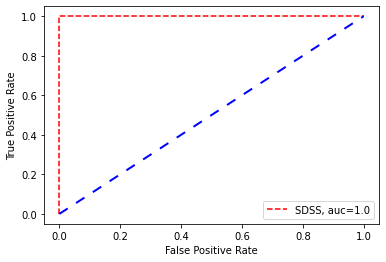

In [ ]:
y_pred_proba = RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="SDSS, auc="+str(auc), linestyle='--',color='r')
plt.plot([0,1], [0,1], linestyle=(0, (5, 5)), linewidth=2, color='b') # add the dotted line with tthe slope of 1
plt.legend(loc=4)
#plt.grid(b=None)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**Random Forest Predicted**

Testing


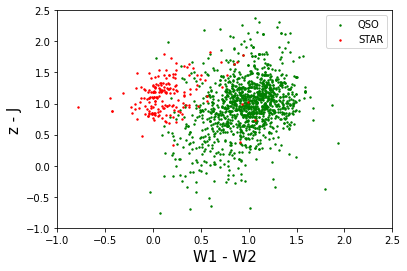

In [ ]:

Attribute.head()
Data_Xtest = pd.DataFrame(X_test)
Data_Xtest.columns = ['Z_spec', 'z - J', 'z_W1', 'resolv', 'W1-W2', 'J_H']
scaled_back = scaling.inverse_transform(Data_Xtest)
Rescale = pd.DataFrame(scaled_back)
Rescale.columns = ['Z_spec', 'z - J', 'z_W1', 'resolv', 'W1-W2', 'J_H']
Final_data.columns
y_test_Frame = pd.DataFrame(y_pred)
y_test_Frame = pd.DataFrame(y_pred)
y_test_Frame.columns=['class_pred']
c = y_test_Frame.index
X_test_data = pd.DataFrame(X_test, columns = ['Z_spec', 'z - J', 'z_W1', 'resolv', 'W1-W2', 'J_H'], index=c)

data_xTest = scaling.inverse_transform( X_test_data)
data_Frame_X_test = pd.DataFrame(data_xTest, index=c)

Final_data.columns

data_Frame_X_test.columns = ['Z_spec', 'z - J', 'z_W1', 'resolv', 'W1-W2', 'J_H']

data_yami = pd.concat([data_Frame_X_test, y_test_Frame], axis = 1)

data_yami.head()
test_data = data_yami.values
z_J_start_test = []
z_W1_start_test = []
W1_W2_start_test = []
J_H_start_test = []
#galaxy
z_J_galaxyt_test = []
z_W1_galaxyt_test = []
W1_W2_galaxyt_test = []
J_H_galaxyt_test = []
for i in test_data:
  if i[-1] == 1:
    z_J_start_test.append(i[1])
    z_W1_start_test.append(i[2])
    W1_W2_start_test.append(i[4])
    J_H_start_test.append(i[5])
  elif i[-1] == 0:
    z_J_galaxyt_test.append(i[1])
    z_W1_galaxyt_test.append(i[2])
    W1_W2_galaxyt_test.append(i[4])
    J_H_galaxyt_test.append(i[5])
  else:
      pass

print('Testing')
plt.scatter(W1_W2_galaxyt_test, z_J_galaxyt_test ,color='g', marker='o', label="QSO",s=2)
plt.scatter(W1_W2_start_test, z_J_start_test, color='red', marker='o', label="STAR",s=2 )
plt.ylabel('z - J' ,  fontsize=15, color="k")
plt.xlabel('W1 - W2',  fontsize=15, color="k")
plt.ylim(-1, 2.5)
plt.xlim(-1, 2.5)
plt.legend(loc = 1)
plt.savefig('Fig')


**FIRST-SDSS-2MASS-WISE-GALEX**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KNN /Final Results/FIRST-SDSS-2MASS-WISE-GALEX.csv')
df = df[df['class_pred'] !='GALAXY']
df=df[df['class_pred']!='-9999']
df.shape

(4740, 192)

In [ ]:
u_g = df.modelMag_u - df.modelMag_g
g_r = df.modelMag_g - df.modelMag_r
r_i = df.modelMag_r - df.modelMag_i
z = df.modelMag_i - df.modelMag_z
resolv = df.psfMag_r - df.modelMag_u
z_J = df.modelMag_z - df.Jmag
J_H = df.Jmag - df.Hmag
H_K = df.Hmag - df.Kmag
Z_spec = df.SpecZ
K_W1 = df.Hmag - df.W1mag
W1_W2 = df.W1mag - df.W2mag
W2_W3 = df.W2mag - df.W3mag
W3_W4 = df.W3mag - df.W4mag
z_W1 = df.modelMag_z - df.W1mag
z_W2 = df.modelMag_z - df.W2mag
W4_FUV = df.W4mag - df.FUVmag
FUV_NUV = df.FUVmag - df.NUVmag
W3_FUV = df.W3mag - df.FUVmag
fuv_r = df.FUVmag - df.modelMag_r
far = df.FUVmag
nuv = df.NUVmag
far_nuv = df.FUVmag - df.NUVmag
NUV_i = df.NUVmag - df.modelMag_i

In [ ]:
data =pd.DataFrame([u_g, g_r, r_i,z,resolv, z_J, J_H, H_K, Z_spec, K_W1, W1_W2, W2_W3, W3_W4, z_W1, z_W2, W4_FUV,FUV_NUV, W3_FUV,fuv_r, far, nuv, far_nuv, NUV_i])

In [ ]:
da = data.transpose()

In [ ]:
da.columns = ['u_g', 'g_r', 'r_i','z','resolv', 'z_J', 'J_H', 'H_K', 'Z_spec', 'K_W1', 'W1_W2', 'W2_W3', 'W3_W4', 'z_W1', 'z_W2', 'W4_FUV','FUV_NUV', 'W3_FUV','fuv_r',  'far', 'nuv', 'far_nuv','NUV_i']

In [ ]:
da.fillna(da.mean(), inplace = True)

In [ ]:
y = df['class_pred']

In [ ]:
Data = pd.concat([da,y], axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data['class_pred'] = le.fit_transform(Data['class_pred'])

In [ ]:
das = pd.DataFrame([Z_spec, z_J, u_g, resolv,  nuv])

In [ ]:
Atr = das.transpose()

In [ ]:
Atr.columns = ['Z_spec', 'z_J', 'u_g', 'resolv', 'NUV']

In [ ]:
Atr.dropna(inplace = True)

In [ ]:
y = Data['class_pred']

In [ ]:
Data = pd.concat([Atr, y], axis = 1)

In [ ]:
Data.fillna(Data.mean(), inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data['class_pred'] = le.fit_transform(Data['class_pred'])

In [ ]:
Data

,Z_spec,z_J,u_g,resolv,NUV,class_pred
6,0.304826,0.657263,0.174116,-0.417404,18.1333,0
7,0.304887,0.657263,0.174116,-0.417404,18.1333,0
8,1.310175,0.461359,0.300085,-0.669246,18.5621,0
10,0.218303,1.008687,0.241819,-0.264740,21.2476,0
11,0.651248,3.386537,0.581276,-0.747473,20.2896,0
...,...,...,...,...,...,...
28414,1.866810,0.660464,0.197092,-0.309675,22.1092,0
28415,1.870153,0.660464,0.197092,-0.309675,22.1092,0
28420,-0.000003,0.876434,1.139417,-1.533916,20.5670,1
28422,1.015927,1.613950,0.736528,-1.487384,20.7424,0


In [ ]:
Data.class_pred.value_counts()

0    4526
1     214
Name: class_pred, dtype: int64

In [ ]:
X = Data.drop('class_pred', axis =1).values

In [ ]:
y = Data.class_pred.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

**Hyper-parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_features': [1,3,4,5],
    'min_samples_leaf': [2,3,4,5],
    'n_estimators': [10, 20, 30,40,50]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'max_features': 1, 'min_samples_leaf': 2, 'n_estimators': 10}

In [ ]:
RF = rf.set_params(criterion = 'entropy',
#max_depth= 15,
 max_features=1,
 min_samples_leaf=2,
 #min_samples_split= 5,
 n_estimators= 10)

In [ ]:
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=1, min_samples_leaf=2,
                       n_estimators=10)

In [ ]:
y_pred= RF.predict(X_test)

In [ ]:
rf.set_params(criterion='entropy', max_features=3,  min_samples_leaf=3, n_estimators=30)

RandomForestClassifier(criterion='entropy', max_features=3, min_samples_leaf=3,
                       n_estimators=30)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Class labels:', np.unique(y))
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(cm)

Class labels: [0 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       905
           1       1.00      1.00      1.00        43

    accuracy                           1.00       948
   macro avg       1.00      1.00      1.00       948
weighted avg       1.00      1.00      1.00       948

[[905   0]
 [  0  43]]


In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.9883495424573703

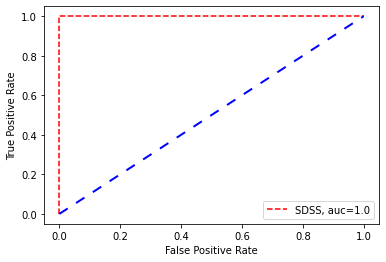

In [ ]:
y_pred_proba = RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="SDSS, auc="+str(auc), linestyle='--',color='r')
plt.plot([0,1], [0,1], linestyle=(0, (5, 5)), linewidth=2, color='b') # add the dotted line with tthe slope of 1
plt.legend(loc=4)
#plt.grid(b=None)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.9883495424573703

**RF Predicted**

In [ ]:
Data = pd.DataFrame(X_test)
Data.columns = ['Z_spec', 'z_J', 'u_g', 'resolv', 'NUV']
scaled_back = scaling.inverse_transform(Data)
Rescale = pd.DataFrame(scaled_back)
Rescale.columns = ['Z_spec', 'z_J', 'u_g', 'resolv', 'NUV']
Data.columns
y_test_Frame = pd.DataFrame(y_pred)
y_test_Frame = pd.DataFrame(y_pred)
y_test_Frame.columns=['class_pred']
c = y_test_Frame.index

In [ ]:
X_test_data = pd.DataFrame(X_test, columns = ['Z_spec', 'z_J', 'u_g', 'resolv', 'NUV'], index=c)

In [ ]:
data_xTest = scaling.inverse_transform( X_test_data)
data_Frame_X_test = pd.DataFrame(data_xTest, index=c)



data_Frame_X_test.columns = ['Z_spec', 'z_J', 'u_g', 'resolv', 'NUV']

data_yami = pd.concat([data_Frame_X_test, y_test_Frame], axis = 1)



In [ ]:
data_yami.head()

,Z_spec,z_J,u_g,resolv,NUV,class_pred
0,0.280965,0.769065,0.293333,-0.276060,19.4384,0
1,0.000217,0.982720,1.876953,-2.569567,22.5547,1
2,-0.000015,1.231201,0.881010,-1.658896,22.4901,1
3,0.164676,1.420790,0.491360,-0.914297,21.4142,0
4,0.465467,0.920779,0.218291,-0.289523,18.2492,0


In [ ]:

test_data = data_yami.values
z_J_start_test = []
u_g_start_test = []
NUV_start_test = []
NUV_i_start_test = []
#galaxy
z_J_galaxyt_test = []
u_g_galaxyt_test = []
NUV_galaxyt_test = []
NUV_i_galaxyt_test = []
for i in test_data:
  if i[-1] == 1:
    z_J_start_test.append(i[1])
    u_g_start_test.append(i[2])
    NUV_start_test.append(i[4])
    NUV_i_start_test.append(i[5])
  elif i[-1] == 0:
    z_J_galaxyt_test.append(i[1])
    u_g_galaxyt_test.append(i[2])
    NUV_galaxyt_test.append(i[4])
    NUV_i_galaxyt_test.append(i[5])
  else:
      pass

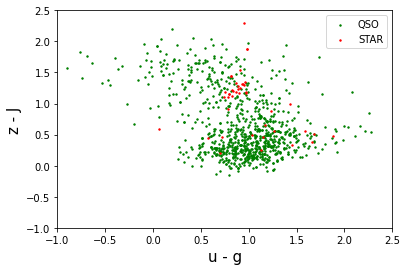

In [ ]:

plt.scatter(z_J_galaxyt_test, u_g_galaxyt_test ,color='g', marker='o', label="QSO",s=2)
plt.scatter(z_J_start_test, u_g_start_test, color='red', marker='o', label="STAR",s=2 )
plt.ylabel('z - J' ,  fontsize=15, color="k")
plt.xlabel('u - g',  fontsize=15, color="k")
plt.ylim(-1, 2.5)
plt.xlim(-1, 2.5)
plt.legend(loc = 1)
plt.savefig('Fig')
